<img src="Images/numpy.png" width="450"> 

<br>

# The NumPy.random package
[Official Documentation](https://numpy.org/doc/stable/reference/random/index.html)
***  

<br>

## Assignment Objectives
- Explain the overall purpose of the numpy.random package.
- Explain the use of the “Simple random data” and “Permutations” functions.
- Explain the use and purpose of at least five “Distributions” functions.
- Explain the use of seeds in generating pseudorandom numbers.

<br>

### Overall purpose of the package

#### numpy (Version 1.21)
NumPy (Numerical Python) is a very popular open source library comprised of multidimensional array objects, mathematical functions, linear algebra<br>
routines, random number generators and more [1]. The library is very popular due to its high level syntax and ability to perform rapid data operations.<br>
One can explain the speed by looking deeper at how the package operates. Data structures known as ndarrays (N-dimensional arrays) only accept data of<br>
the same type and then map these data structured to highly optimised C compiled code [2]. As Soklaski 2020 describes, this process of vectorization is<br>
so effective when compared to iterating lists and tuples as the ndarrays dont have to check every elements data-type on iteration, resulting in a process<br>
that is orders of magniture faster.<br> 

NumPy's operational speed and diversity of mathematical functions make the package of great utility for tasks that involve numerical processing on large<br>
datasets, such as Machine Learning. The package also provides a very useful module for generating random numbers that will now be explored, a package<br>
named *numpy.random*.

<br>

#### numpy.random

This sub-module has the ability to produce pseudo-random sequences and model chosen statistical distribtions, which can be powerful when applied to data<br>
science or machine learning applications. Considering that certain real world phenomena follow predictable distibutions when the sample size is of sufficient<br> 
scale, one can generate a model and make predictons. An example of this would be modelling population as a *normal distribtuion* (bell-curve shape) and using<br> 
this model to make predictions on real-world data.

As per the offical documnetation the random sub-module functions can be categorized into the following: <br>
- *Simple random data* functions that can generate pseudo-random data arrays. 
- *Permutations* function that are used to randomly modify a sequence.
- *Distribution* functions that use randomly generated arrays to sample from a chosen statistical distribtuion.<br>


<br>

### Simple random data
***
As per the offical documentation, the approach of numPy V1.21 to generating random numbers consists of using a *BitGenerators* and a *random generator*.<br> 
The BitGenerators produces an array of random bits which which are passed to a generator, which can be used to model different probability distributions.<br>
One can call the *default_rng()* constructor to instansiate an object of the Generator Class and then apply *simple random data* functions that belong to the class.<br> Before exploring this further lets import the relevant libraries and define histogram functions for future use.

In [1]:

# import libraries
%matplotlib inline
import numpy as np                   
import matplotlib.pyplot as plt        

# Construct new Generator and store in rng variable
# Uses default BitGenerator (PCG64)
rng = np.random.default_rng()

In [2]:
def plot_hist_twice(array_one, array_two, title_one, title_two, fig_ref):
    
    fig, axs = plt.subplots(1, 2, sharex = True, sharey = False, figsize = (8, 5))
    axs[0].hist(array_one, density = False, bins = 30, rwidth = 10)
    axs[1].hist(array_two, density = False, bins = 30, rwidth = 10)
    
    plt.figtext(0.5, 0.0, fig_ref, wrap=True, horizontalalignment = 'center', fontsize = 15)   
        
    # loop over axes objects in the figure object.. why not
    
    for plot_index, ax in enumerate(fig.axes):          
        ax.set_xlabel('data range')   
        ax.set_facecolor('silver')
 
        if plot_index < 1:     
            ax.set_title(str(title_one))  
            ax.set_ylabel('count')
        else:     
            ax.set_title(str(title_two))  
     
    fig.tight_layout(pad = 2)
    plt.show()


<br>

#### Random Generator Functions

This version of NumPy recommends two random number generating functions that can be utilised when one accesses the Generator via<br>
*np.random.default_rng()*. Both functions produce random numbers from the uniform distribution. In other words, all outcomes are equally likely and can<br> produce a symmetric probability distribution when the sample size sufficient scale, see the two functions below.

- ***generator.integers()*** <br>
Produces random integers from a "discrete" uniform distribution. This means that any symmetric probability distriubtion has a finite number of<br>
values [7]. This makes sense as the function produces whole numbers. See *Figure 1* below and the code used to generate the histogram to see the uniformity<br> of the distribution and how it increases with a larger sample size.<br><br>
- ***generator.random()*** <br>
Produces random floating point numbers from a “continuous" uniform distribution, i.e : any symmetric probability distriubtion has an infinite number of<br> possible values [7]. This also makes sense as the function can produce an infinite range of numbers (floats).

                             data type check :int64


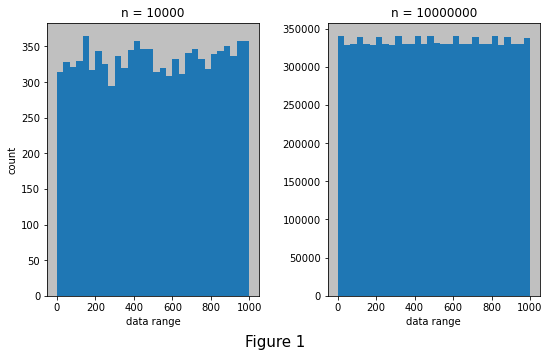

In [3]:
# generator.integers function
# syntax: Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)

# Call integers function on generator and pass n values  
# of range 0 (inclusive) to 1001 (exclusive) and dtype int64    
small_array = rng.integers(1001, size = 10000)     
large_array = rng.integers(1001, size = 10000000)   

# check data type
print(' '*28, 'data type check :' + str(small_array.dtype))

# Pass variables to hist function
plot_hist_twice(small_array, large_array, 'n = 10000', 'n = 10000000', 'Figure 1')

<br>

#### Choice Function
This function can:
- Create a random array similar to the *np.arange()* function.
- Generate or selects a random sample from a given 1-darray or list. As per the documentation the choice method samples from a uniform distribution, however
<br>one can pass a probability list / array to alter this distribution (Reference Figure 2).


In [4]:
# randomly select 10 numbers between 0 - 10
rand_array = rng.choice(11, size = 10)     # acts like np.arange(n)
rand_array 

array([10,  6,  6,  3, 10,  2,  7,  3,  2,  5], dtype=int64)

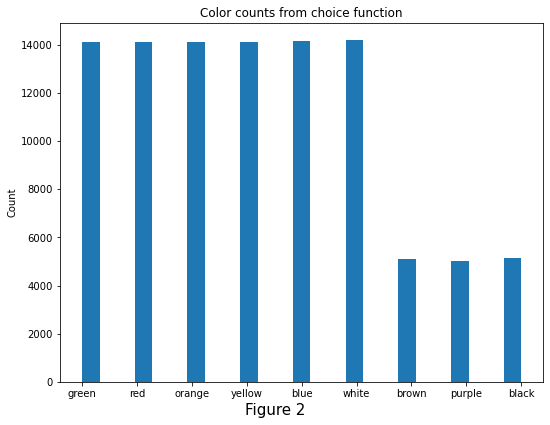

In [5]:

# This cell will explore the choice methods ability to sample from a uniform distribution
# and its p (probability) parameter

colors = ['blue', 'black', 'green', 'red', 'yellow', 'orange', 'purple', 'brown', 'white']
selections = []
selections_weighted = []
probabilities = []

# append choices from color list to selections list
for i in range(10000):
    selection = rng.choice(colors) 
    selections.append(selection)
    
 
    # make weighted proability list 
for color in colors:
    if color in ['black', 'brown', 'purple']:
        probabilities.append(0.05)
    else:
        probabilities.append(0.85/6)
        
    # make choices over large range
for i in range(100000):
    selection_weighted = rng.choice(colors, p = probabilities)      # pass weighted probability list to choice()  
    selections_weighted.append(selection_weighted)                  # append choices to weighted list

# plot hisrogram 
plt.figure(figsize = (8, 6))
plt.hist(selections_weighted, bins = 25)     
plt.figtext(0.5, 0.01, 'Figure 2', wrap = True, horizontalalignment = 'center', fontsize = 15)  
plt.title('Color counts from choice function')  
plt.xticks(colors)
plt.ylabel('Count')
plt.tight_layout(pad = 2)
plt.show()

**Figure 2** Shows a uniform distribution for blue, green, red, yellow, orange, white. One can see the choice method selected black, brown and purple less <br>
frequently as each item had a probability of circa 5% (0.05 in code), despite being uniformly selected relative to eachother.

<br>

### Pemutation Functions
When dealing with ndarrays, one can think of a permutation as any possible arrangment of the elements in that array [8]. NumPy offers three different <br>
permutation functions that can randomly re-arrange the element sequence of the given array, these functions will be explored in more detail below. <br>

<br>

**Some uses in Machine Learning:**   
1. Shuffling can be used to reduce the variance and prevent a given model from learning irrelevant noise through its training dataset which would in turn effects<br>
its ability to accurately predict new data (overfitting)[9]. Calomme 2017 describes how in a in regular stochastic gradient descent one should shuffle their<br>
data after each epoch to keep model learning without selection bias. <br> <br>
2. In a Machine Learning model feature importance is of great interest as it informs the data scientist what features have the greatest impact on a models ability<br>
to make accurate predictions. One can deduce information on features importance by randomly shuffling selected selected values and observing the new predicitions of<br>
the model relative to its original prediction. Billiau 2021 describes how a small decrease in model accuracy suggests that the shuffled data are not contributing<br>
heavily to your models ability to predict outcomes. The process can be very useful when correctly applied accross all features as one can now rank order the featues<br>
by importance.

In [6]:
# template array
array = np.arange(15).reshape((3, 5))
print('Template Array')
print(array)

# axis = 0 shuffles rows
# axies =1 shuffles columns

# shuffle template along rows 
rng.shuffle(array, axis = 0)                     
print('\nShuffled sub arrays along rows (axis = 0)  \nInplace always True')
print(array)


# define new array and shuffle along columns
array = np.arange(15).reshape((3, 5))                                             
array_cols_permutation = rng.permutation(array, axis = 1)
print('\nPermutation of sub arrays along cols (axis = 1)  \nGenerates Copy')
print(array_cols_permutation)


# template passed to permuted function 
array_permuted = rng.permuted(array, axis = 0)  
print('\nPermuted Array \nEach slice of rows shuffled independantly')
print(array_permuted)

Template Array
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

Shuffled sub arrays along rows (axis = 0)  
Inplace always True
[[10 11 12 13 14]
 [ 5  6  7  8  9]
 [ 0  1  2  3  4]]

Permutation of sub arrays along cols (axis = 1)  
Generates Copy
[[ 4  2  3  0  1]
 [ 9  7  8  5  6]
 [14 12 13 10 11]]

Permuted Array 
Each slice of rows shuffled independantly
[[10  1  7  8 14]
 [ 0 11  2  3  4]
 [ 5  6 12 13  9]]


### Probability Distributions
A probability distribution is a function that describes all of the possible outcomes of a random variable along with their corresponding probability values [13]. The numPy package<br>
provides a range of subroutines that can model important statistical distributions. These subroutine can be accessed by calling the default_rng() constructor to instansiate an object<br>
of the Generator Class and calling the distribution subroutine on the object. 

The ability to sample random data from chosen distribution is of great benifit as one can model different scenarios if they have information on the distribution subroutine input<br> 
parameters. The ease of access to probability distributions allows one to predict or calculate the probabilies of defined outcomes. Brooks-Bartlett 2018 breaks down the different<br>
types of probability predictor functions into:
- Probability Mass Function (PMF): Represents discrete probability distributions and can calculate probability of an outcome.
- Probability Density Function (PDF): Represents continuous probability distributions and can calculate probability over a range by integrating the area under a curve.

Onnen, 2021 describes how data scientists can join the dots of the 3-point-estimation technique to avoid business pitfalls, i.e: model the best case, likely case and worst<br>
case to help describe possible outcomes with their associated probabilities. Key distributions offered by numPy will now be explored.

<br>

#### Normal distribution 
[Official Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)


##### Function Usage
*Syntax: random.Generator.normal(loc = 0.0, scale = 1.0, size = None)* <br>

This function draw random samples from a Guassian (normal) distribution. It accepts 3 parameters:
- *loc*: this is the mean or centre of the normal distribution.
- *scale*: this is the standard deviation or spread of the distribution.
- *size*: Shape of output array (number of dimensions * number of samples drawn (exclusive))



##### Distribution Description
The shape of the distribution resembles that of a bell<br>
shape curve and as per Barai 2020, some of its key chracteristics include: <br>

- Continuous  distribution, one local maximum in centre of distribution where the variables spread evenly from this mode.<br>
- Symmetric about the mean, whereby a perfect normal distribution has the same mean, median and mode (this will be explored later).
- The Standard Normal Distribution (mean = 0, standard deviation = 1) has defined data spread:
    - 68.3 % of data falls withing one std devs of the mean
    - 99.7 %  of data falls withing three std devs of the mean

The normal distribution can be described by its mean and standard deviation, whereby the probability of being selected rises as you approach the mean and spread increases<br>
with standard deviation, thereby effecting the heaviness of the distribution tails (kurtosis)[15]. See *Figure 4* below for exploration of how the standard normal distribution<br>
changes with different mean and std dev values,  


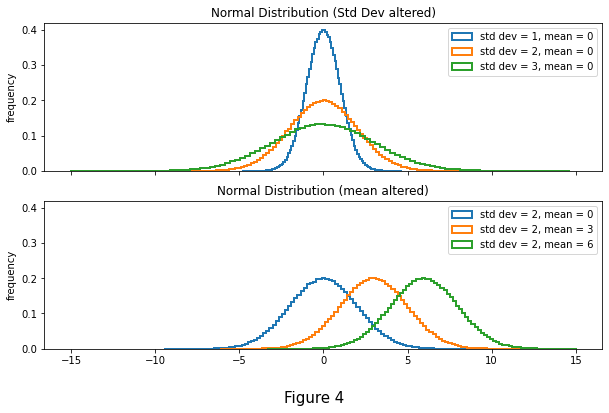

In [7]:
def plot_normal_distributions(axis_check, mean, std_dev):
    # pass mean, std dev and number of runs into generator.normal function
    normal_array = rng.normal(mean, std_dev, 1000000)      
    
    if axis_check == 'axis_1':
        ax1.hist(normal_array, bins = 100, histtype = 'step', linewidth = 2.0, 
                    label = "std dev = " + str(std_dev) + ", mean = " + str(mean), density = True) 
        
        ax1.set_title('Normal Distribution (Std Dev altered)')
        ax1.set_ylabel('frequency')
        ax1.legend(loc='upper right')
        
    else:
        ax2.hist(normal_array, bins = 100, histtype = 'step', linewidth = 2.0, 
                    label = "std dev = " + str(std_dev) + ", mean = " + str(mean), density = True) 
        
        ax2.set_title('Normal Distribution (mean altered)')
        ax2.set_ylabel('frequency')
        ax2.legend(loc='upper right')

# generate 2 subpots and pass axis_check, mean and std dev to plotting function        
Fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, sharey = True, figsize = (10, 6))
plt.figtext(0.5, 0.0, 'Figure 4', wrap = True, horizontalalignment = 'center', fontsize = 15)

plot_normal_distributions('axis_1', mean = 0, std_dev = 1)
plot_normal_distributions('axis_1', mean = 0, std_dev = 2)
plot_normal_distributions('axis_1', mean = 0, std_dev = 3)
plot_normal_distributions('axis_2', mean = 0, std_dev = 2)
plot_normal_distributions('axis_2', mean = 3, std_dev = 2)
plot_normal_distributions('axis_2', mean = 6, std_dev = 2)

plt.show()

### Seed

### References

[1]. Tutorialspoint, 2021, NumPy Tutorial, Available at: https://www.tutorialspoint.com/numpy/index.htm (Accessed: 21 October 2021).<br>

<br> 

[2]. Soklaski, R, 2020, “Vectorized” Operations: Optimized Computations on NumPy Arrays, Available at:<br> https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html# (Accessed: 21 October 2021).<br>

<br> 

[3]. Mahto, P, 2020, NumPy For Machine Learning, Available at: https://medium.com/mlpoint/numpy-for-machine-learning-211a3e58b574<br>
(Accessed: 26 October 2021).<br>

<br>

[4]. Bertoldi, D, 2019, Building a Pseudorandom Number Generator, Available at: https://www.tutorialspoint.com/numpy/index.htm<br>
 (Accessed: 26 October 2021).<br>
 
<br>
 
[5]. Harris, C.R. et al., 2020. Array programming with NumPy. Nature, 585, pp.357–362. <br>

<br>
 
[6]  Sarkar, T, 2020, How to generate random variables from scratch, Available at:<br>
https://towardsdatascience.com/how-to-generate-random-variables-from-scratch-no-library-used-4b71eb3c8dc7 (Accessed: 27 October 2021). <br>


<br>
<br>
<br>
<br>
<br>
